07-1

이 강의에선 몇가지 꿀팁들을 알려줌

1. Learning Rate 의 초기설정
2. Data Preprocessing 데이터 전처리
3. Overfitting 너무 학습데이터에 착 붙어있게 되는 overfitting

우선 Learning Rate에 대해 알아보자.

Learning Rate를 잘못 설정하면 Gradient Descent 할때 구간 반복을 할수도 있고<br>
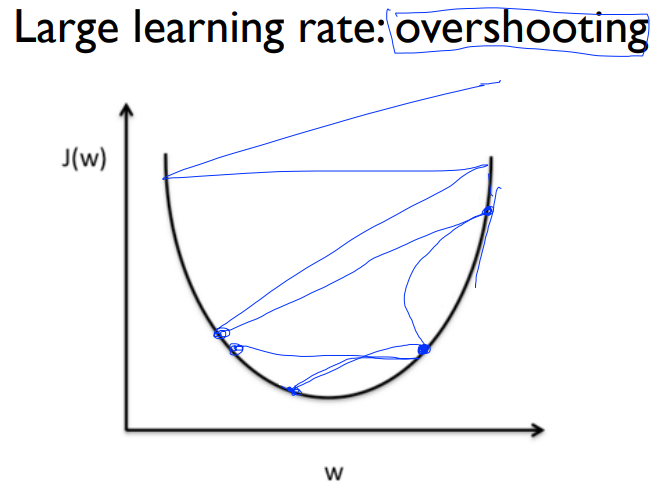
너무 크다면 발산해버릴 수도 있음.<strong>(발산하는 경우를 Overshooting 이라고 부름)</strong><br>
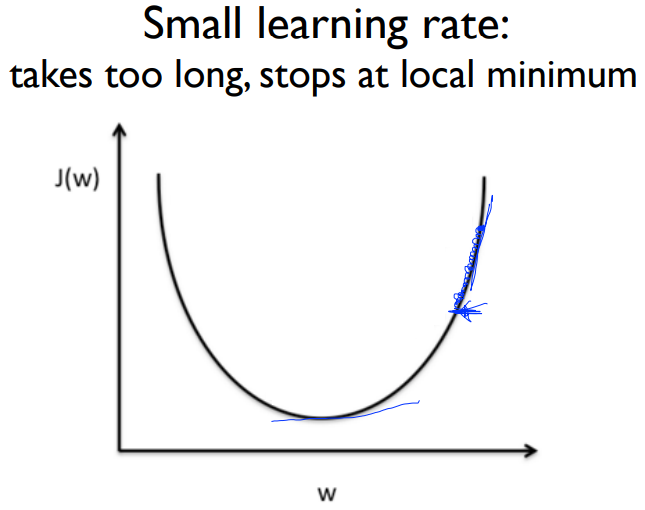
너무 작으면 학습에 시간이 너무 오래 걸릴수도 있음. 최적점을 못찾았는데 설정한 step수가 끝날 수 있음

일단 결론적으로 learning rate를 정하는 정답은 당연히 없음. 실험을 계속 해봐야 함.<br>
보통 초기값으론 0.01을 많이 주긴함.

다음으로 데이터 전처리임

보통 데이터 간의 갭이 너무 클때 사용함. <strong>(사실 이 부분 설명 잘 못알아 들음)</strong><br>
데이터 간의 갭이 큰 얘들이 있으면 학습 도중 발산 할 수 있음.

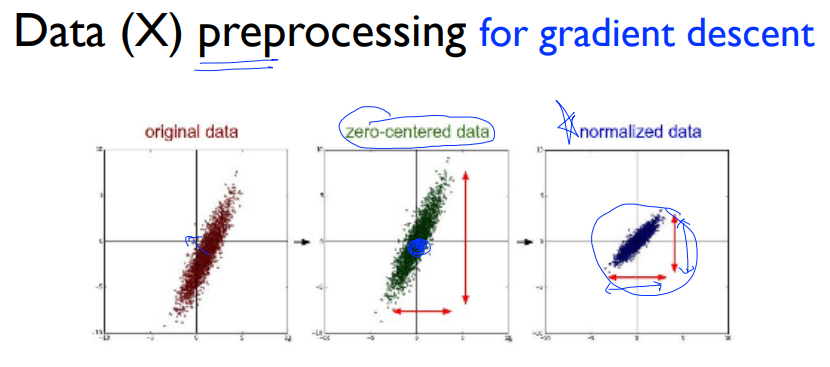
전처리 하는 방법은 여러가지가 있는데 그중 normalize를 많이쓰고.<br>
normalize에서도 많이 쓰는 normalize는 Standardization임. 정규화.

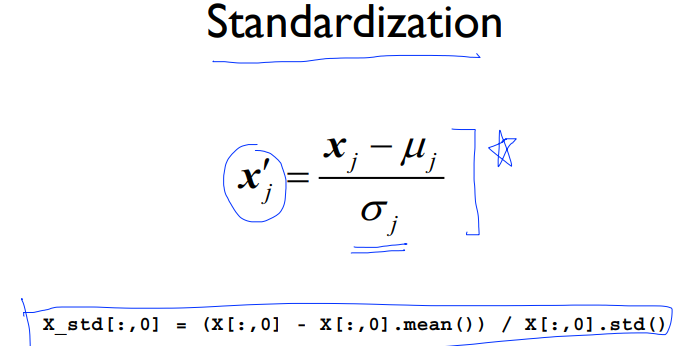
정규화 식은 잘 알고있는 그 식 맞고, 코드로는 위 처럼 쓰면 됨

마지막으로 Overfitting은 머신러닝에서의 중요 논쟁점중 하나임.

학습 데이터로 학습을 하기 때문에 너무 학습 데이터에 맞아버려서 학습 데이터와 비슷한 것들은 매우 잘 맞추지만 조금만 벗어나면 예측이 이상해져버리는 경우.<br>
이거 약간 사람으로 비유해도 이런 부류의 사람들 있는거 생각해보면 머신러닝이 정말 사람 같긴 함.


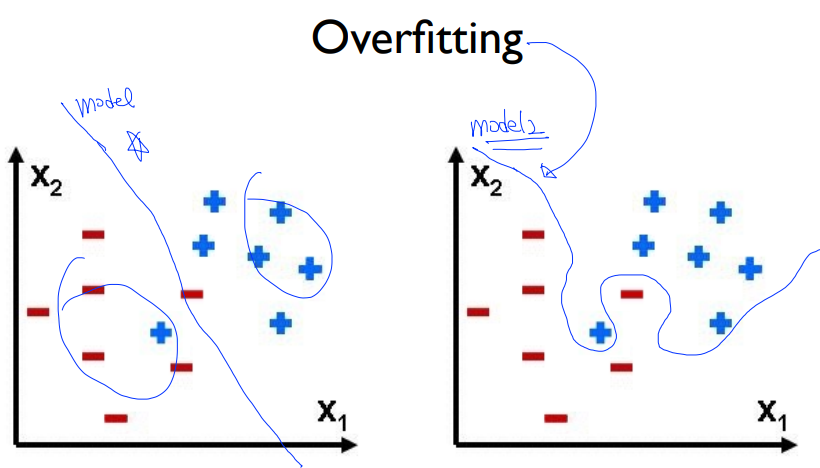
개념적으로 보자면 위 그림에서 보면 왼쪽이 일반적인 모델이고 오른쪽이 주어진 데이터에 overfitting된 모델임.

overfitting을 줄이는 방법은

1. More Training data
2. Reduce the number of features
3. Regularization

요정도. 근데 여기서 기술적으로 알아둬야 할 부분은 3. Regularization 이다. 하는 방법 자체는 간단함

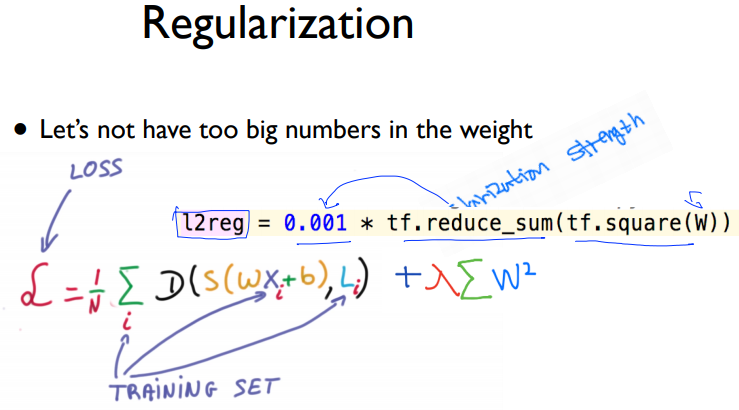
위 처럼 cost함수 뒤에 추가수식을 붙임. 약간 구부러진 함수를 펴주는 역할임. W는 변수고 앞에 문자는 regularization strength라고 부름(이 부분 수학적으로 더 이해하고 싶긴 함)<br>
물론 구현은 라이브러리로 나와 있으니 간단하다.(위 사진의 l2reg 가 regularization strength)

07-2

내가 만든 모델의 성능을 어떻게 평가할까?

training set -> 학습 시키는 데이터

근데 training set으로 모델을 만들고 다시 training set 으로 테스트 하면 거의 100% 맞출것임.

그래서 보통 가지고 있는 data set 중 training set과 test set을 나눔. test set은 테스트 하는데만 써야함.<br>
training set으로 트레이닝 시키고 test set으로 테스트 하는 것.

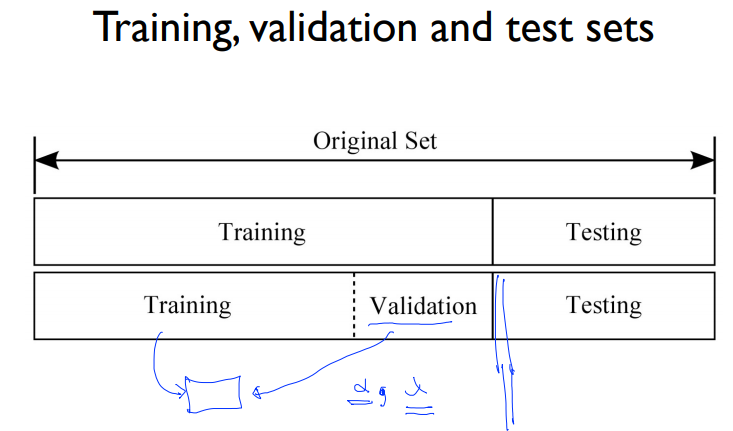
그런데 사실 training set도 training set과 validation set으로 나눔. 전 강의에서 regularization할때 알파 값과 람다 값을 주었지.<br>
training set으로 모델 만들고 validation set으로 알파, 람다 값 조절함.<br>
test set은 진짜 그냥 test만.

training set -> 교과서<br>
validation set -> 실전 모의고사 ㅋㅋ<br>
test set -> 시험

이런 느낌임

다음으로 알려줄건 Online Learning 이라는 학습 방법임. 

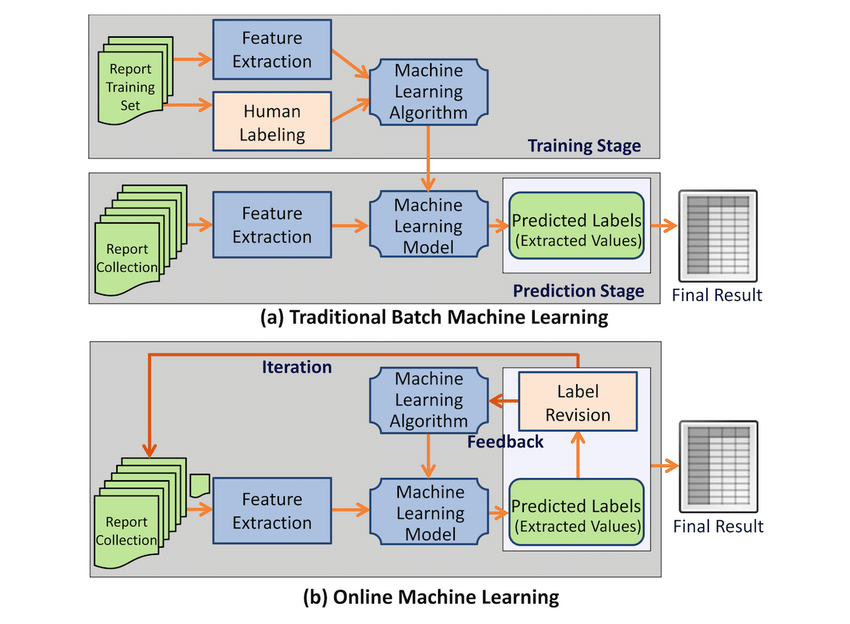

강의설명에 내가 찾은거 추가 하자면, 기존의 러닝 방법은 모델에 학습시킨걸 고정시켜놓고 사용하는데 Online Learning은 말 그대로 새로 학습하면 바로 업데이트 돼서 online 처럼 사용하는거 같음

많은 데이터를 한번에 넣기 힘드니까

예를들어 100만개 데이터중 10만개씩 끊어서 학습 시키는 상황에서,<br>
10만개를 학습하고 다음 10만개 할때 이전의 데이터들이 남아 있어야됨.<br>
이런 학습방법이 online learning임.

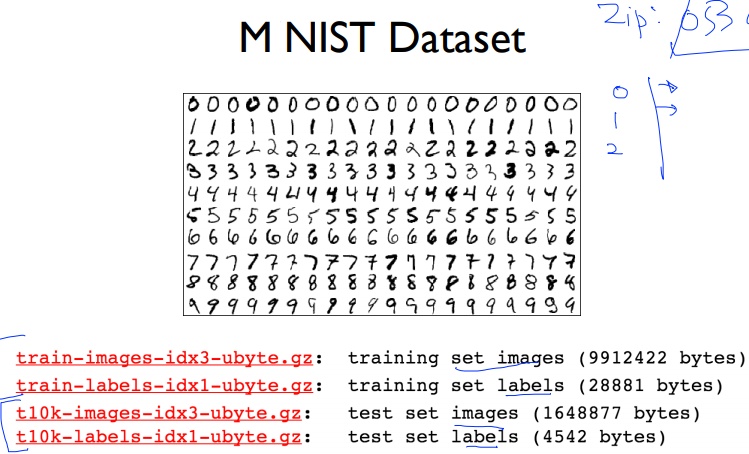

MINIST Dataset이란걸 보자. 머신러닝의 Hello World임. <br>
미국 우체국에서 쓸려고 만든거. 이게 학습용으로 많이 쓰는 Data set인데 이것도 train set과 test set을 나눠서 올려둠.

자 그럼, 처음 질문인 Accuracy는 어떻게 측정할까?

사실 간단하지. 테스트 데이터가 있으니까 테스트 데이터중 몇개를 맞추는지만 세면 되니까

이미지 관련 분야는 95~99%는 돼야 인정해줌.

실제로 어떻게 하는진 다음 lab강의에서 보여줌

In [12]:
# lab07-1

# 일단 이번 방법은 learning rate과 accuracy 평가하는걸 배워보겠다.
# 학습의 포인트는 training set과 test set을 나누는 것.

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# training set
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

# placeholder, variable
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# hypothesis, cost, optimizer
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# prediction
prediction = tf.arg_max(hypothesis, 1) ## 여기
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))
    
# accuracy 평가하는건 쉽네.

0 3.03978 [[-0.179388   -0.74392146  0.31428337]
 [-0.88913894  1.6955247   1.9767228 ]
 [ 1.3417836  -0.09924556 -0.7182551 ]]
1 2.58165 [[-0.16986744 -0.7730048   0.33384615]
 [-0.76111436  1.5376257   2.0065973 ]
 [ 1.4318813  -0.22057131 -0.68702704]]
2 2.1657162 [[-0.16662604 -0.77067906  0.32827905]
 [-0.65403473  1.5415692   1.8955741 ]
 [ 1.4958441  -0.19105938 -0.7805018 ]]
3 1.9418093 [[-0.16874087 -0.78336614  0.34308097]
 [-0.56999093  1.45619     1.8969096 ]
 [ 1.5354108  -0.23908873 -0.77203906]]
4 1.8422089 [[-0.18022548 -0.7789349   0.35013434]
 [-0.5348471   1.4644874   1.8534683 ]
 [ 1.525245   -0.20009561 -0.80086637]]
5 1.8057961 [[-0.19213077 -0.78161496  0.36471972]
 [-0.501745    1.4320958   1.8527579 ]
 [ 1.5133556  -0.19659713 -0.7924756 ]]
6 1.7801633 [[-0.20611416 -0.780004    0.37709212]
 [-0.4804419   1.423613    1.8399377 ]
 [ 1.4897223  -0.1715239  -0.79391545]]
7 1.755904 [[-0.21900429 -0.7805966   0.3905748 ]
 [-0.45324388  1.4024737   1.833879  ]
 [ 1.

In [13]:
# 다음으로 learning rate 에 대해서...
# 위에 코드를 가져와서 learning rate를 한번 이상한 값을 줘보자. 
# 크게 주면 발산하는걸 볼 수 있다. nan이 계속 찍힘.Not A Number

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# training set
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

# placeholder, variable
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# hypothesis, cost, optimizer
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

# prediction
prediction = tf.arg_max(hypothesis, 1) ## 여기
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 6.8692584 [[-0.04577994  0.38863394  0.5680973 ]
 [-3.7067993   1.6888301   1.6669545 ]
 [-2.7458591   2.1490648   1.6318482 ]]
1 18.015173 [[ 0.32922006 -0.40914515  0.9908764 ]
 [-1.2692993  -1.815011    2.7332954 ]
 [-0.30835915 -1.232193    2.575606  ]]
2 27.61287 [[ 0.70421964  0.1533548   0.05337691]
 [ 1.1681998   0.809989   -2.3292036 ]
 [ 2.1291404   1.580307   -2.6743934 ]]
3 9.475149 [[-0.31402534  0.60910034  0.6158763 ]
 [-2.6829898   3.16118    -0.8292048 ]
 [-1.7722859   4.169234   -1.361894  ]]
4 29.071018 [[ 0.06097466 -0.32839948  1.1783762 ]
 [-0.24548984 -0.7763195   0.67079496]
 [ 0.66521406  0.4192338  -0.04939425]]
5 3.666424 [[ 0.3742944   0.22226834  0.31438863]
 [ 2.0232368   1.8222027  -4.1964536 ]
 [ 2.8153238   3.1820974  -4.962367  ]]
6 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
7 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
8 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
9 nan [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
10 nan [[nan na

In [15]:
# learning rate를 겁나 작게 줘보자. step이 진행되도 cost가 변하질 않음
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# training set
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

# test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]

# placeholder, variable
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# hypothesis, cost, optimizer
hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000000000001).minimize(cost)

# prediction
prediction = tf.arg_max(hypothesis, 1) ## 여기
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# run
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y:y_data})
        print(step, cost_val, W_val)
        
    print("Prediction : ", sess.run(prediction, feed_dict={X:x_test}))
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test, Y:y_test}))

0 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
1 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
2 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
3 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
4 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
5 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
6 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]
 [-0.4266819  -1.0331026   0.78974885]]
7 7.3375473 [[ 0.48194942  0.09230559 -1.165112  ]
 [-0.22528833  1.27339     1.4133335 ]


In [20]:
# 근데 learning rate를 잘 줬는데도 NaN 찍히는 경우가 있는데 
# 그러면 일단 혼자 범위가 튀는 데이터가 있나 살펴보고 
# 있다면, 그땐 Normalize를 생각해보자. 
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
 [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
 [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
 [816, 820.958984, 1008100, 815.48999, 819.23999],
 [819.359985, 823, 1188100, 818.469971, 818.97998],
 [819, 823, 1198100, 816, 820.450012],
 [811.700012, 815.25, 1098100, 809.780029, 813.669983],
 [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
    print(step, "Cost: ", cost_val, "\nPrediction: \n", hy_val)
    
# cost가 점점 커지더니 발산해버림

0 Cost:  10786892000000.0 
Prediction: 
 [[2317724.5]
 [4664517. ]
 [3669672. ]
 [2572792.2]
 [3031952.8]
 [3057461. ]
 [2802362.2]
 [3567623.8]]
1 Cost:  1.1851347e+28 
Prediction: 
 [[-7.6791851e+13]
 [-1.5458988e+14]
 [-1.2161028e+14]
 [-8.5248155e+13]
 [-1.0046951e+14]
 [-1.0131514e+14]
 [-9.2858837e+13]
 [-1.1822776e+14]]
2 Cost:  inf 
Prediction: 
 [[2.5453692e+21]
 [5.1240898e+21]
 [4.0309364e+21]
 [2.8256651e+21]
 [3.3301972e+21]
 [3.3582267e+21]
 [3.0779311e+21]
 [3.9188182e+21]]
3 Cost:  inf 
Prediction: 
 [[-8.4369696e+28]
 [-1.6984488e+29]
 [-1.3361082e+29]
 [-9.3660480e+28]
 [-1.1038388e+29]
 [-1.1131296e+29]
 [-1.0202218e+29]
 [-1.2989452e+29]]
4 Cost:  inf 
Prediction: 
 [[2.7965475e+36]
 [5.6297371e+36]
 [4.4287110e+36]
 [3.1045029e+36]
 [3.6588228e+36]
 [3.6896181e+36]
 [3.3816627e+36]
 [4.3055290e+36]]
5 Cost:  inf 
Prediction: 
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
317 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
318 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
319 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
320 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
321 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
322 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
323 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
324 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
325 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
326 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
327 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]


 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
638 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
639 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
640 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
641 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
642 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
643 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
644 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
645 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
646 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
647 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
648 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]


936 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
937 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
938 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
939 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
940 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
941 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
942 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
943 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
944 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
945 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
946 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
947 Cost:  nan 
Prediction: 
 [[nan]
 [nan]

1245 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1246 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1247 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1248 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1249 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1250 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1251 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1252 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1253 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1254 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1255 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1256 Cost:  nan 
Prediction: 
 [

1566 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1567 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1568 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1569 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1570 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1571 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1572 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1573 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1574 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1575 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1576 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1577 Cost:  nan 
Prediction: 
 [

1881 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1882 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1883 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1884 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1885 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1886 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1887 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1888 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1889 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1890 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1891 Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1892 Cost:  nan 
Prediction: 
 [

In [37]:
# 아는 방법으로 normalize 해도 되고 요즘 MinMaxScaler라는 걸로 한방에 해결할수도 있음. 

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
 [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
 [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
 [816, 820.958984, 1008100, 815.48999, 819.23999],
 [819.359985, 823, 1188100, 818.469971, 818.97998],
 [819, 823, 1198100, 816, 820.450012],
 [811.700012, 815.25, 1098100, 809.780029, 813.669983],
 [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

####### 여기 -> 강의때랑 MinMaxScaler 사용법이 바뀜
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
xy = min_max_scaler.fit_transform(xy) 
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape = [None, 4])
Y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
    print(step, "Cost: ", cost_val, "\nPrediction: \n", hy_val)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  1.5252075 
Prediction: 
 [[-1.9063185 ]
 [ 0.1560333 ]
 [-0.1147583 ]
 [-0.4513615 ]
 [-0.39459914]
 [-0.35283628]
 [ 0.26477933]
 [ 0.7094044 ]]
1 Cost:  1.5251372 
Prediction: 
 [[-1.9062662 ]
 [ 0.15607826]
 [-0.11472061]
 [-0.45133203]
 [-0.39456394]
 [-0.35280257]
 [ 0.26479957]
 [ 0.7094224 ]]
2 Cost:  1.5250669 
Prediction: 
 [[-1.9062139 ]
 [ 0.1561232 ]
 [-0.11468294]
 [-0.4513026 ]
 [-0.39452872]
 [-0.35276887]
 [ 0.2648198 ]
 [ 0.70944047]]
3 Cost:  1.5249966 
Prediction: 
 [[-1.9061617 ]
 [ 0.15616818]
 [-0.1

 [[-1.8973457 ]
 [ 0.16373844]
 [-0.10829401]
 [-0.4463059 ]
 [-0.3885566 ]
 [-0.34705627]
 [ 0.2682522 ]
 [ 0.712493  ]]
173 Cost:  1.51312 
Prediction: 
 [[-1.8972937 ]
 [ 0.1637831 ]
 [-0.1082565 ]
 [-0.44627663]
 [-0.3885216 ]
 [-0.34702274]
 [ 0.2682723 ]
 [ 0.7125109 ]]
174 Cost:  1.5130507 
Prediction: 
 [[-1.8972416 ]
 [ 0.16382767]
 [-0.10821904]
 [-0.44624737]
 [-0.3884866 ]
 [-0.34698924]
 [ 0.26829243]
 [ 0.7125288 ]]
175 Cost:  1.5129812 
Prediction: 
 [[-1.8971897 ]
 [ 0.16387235]
 [-0.10818158]
 [-0.44621807]
 [-0.38845158]
 [-0.34695578]
 [ 0.2683125 ]
 [ 0.7125467 ]]
176 Cost:  1.5129119 
Prediction: 
 [[-1.8971378 ]
 [ 0.16391702]
 [-0.10814413]
 [-0.44618875]
 [-0.38841653]
 [-0.34692228]
 [ 0.2683327 ]
 [ 0.7125646 ]]
177 Cost:  1.5128427 
Prediction: 
 [[-1.8970858 ]
 [ 0.16396168]
 [-0.1081067 ]
 [-0.4461595 ]
 [-0.38838157]
 [-0.34688884]
 [ 0.2683528 ]
 [ 0.71258247]]
178 Cost:  1.5127732 
Prediction: 
 [[-1.8970338 ]
 [ 0.16400634]
 [-0.10806924]
 [-0.44613022]

503 Cost:  1.4904778 
Prediction: 
 [[-1.8802289 ]
 [ 0.17842394]
 [-0.09597319]
 [-0.43667036]
 [-0.37703842]
 [-0.33603936]
 [ 0.27486455]
 [ 0.71836823]]
504 Cost:  1.49041 
Prediction: 
 [[-1.8801775 ]
 [ 0.17846805]
 [-0.09593622]
 [-0.43664142]
 [-0.37700385]
 [-0.33600634]
 [ 0.27488437]
 [ 0.7183858 ]]
505 Cost:  1.490342 
Prediction: 
 [[-1.880126  ]
 [ 0.17851205]
 [-0.0958993 ]
 [-0.43661255]
 [-0.37696925]
 [-0.33597326]
 [ 0.2749042 ]
 [ 0.71840346]]
506 Cost:  1.4902742 
Prediction: 
 [[-1.8800746 ]
 [ 0.17855605]
 [-0.09586227]
 [-0.43658364]
 [-0.37693477]
 [-0.33594024]
 [ 0.27492404]
 [ 0.71842104]]
507 Cost:  1.4902065 
Prediction: 
 [[-1.8800232 ]
 [ 0.17860006]
 [-0.09582536]
 [-0.43655473]
 [-0.37690017]
 [-0.33590716]
 [ 0.27494383]
 [ 0.7184386 ]]
508 Cost:  1.490139 
Prediction: 
 [[-1.8799719 ]
 [ 0.17864418]
 [-0.09578844]
 [-0.43652582]
 [-0.37686566]
 [-0.3358741 ]
 [ 0.27496368]
 [ 0.7184562 ]]
509 Cost:  1.4900713 
Prediction: 
 [[-1.8799205 ]
 [ 0.178688

821 Cost:  1.4691603 
Prediction: 
 [[-1.863968  ]
 [ 0.19236091]
 [-0.08428112]
 [-0.42752746]
 [-0.3661069 ]
 [-0.32558465]
 [ 0.2811306 ]
 [ 0.72392994]]
822 Cost:  1.4690943 
Prediction: 
 [[-1.8639172 ]
 [ 0.19240437]
 [-0.08424462]
 [-0.4274989 ]
 [-0.3660727 ]
 [-0.32555202]
 [ 0.28115013]
 [ 0.7239472 ]]
823 Cost:  1.4690279 
Prediction: 
 [[-1.8638664 ]
 [ 0.19244795]
 [-0.08420818]
 [-0.42747036]
 [-0.36603856]
 [-0.32551938]
 [ 0.2811697 ]
 [ 0.7239646 ]]
824 Cost:  1.4689618 
Prediction: 
 [[-1.8638157 ]
 [ 0.1924913 ]
 [-0.08417167]
 [-0.4274418 ]
 [-0.3660044 ]
 [-0.32548675]
 [ 0.28118923]
 [ 0.72398186]]
825 Cost:  1.4688957 
Prediction: 
 [[-1.8637649 ]
 [ 0.19253473]
 [-0.08413523]
 [-0.4274132 ]
 [-0.36597034]
 [-0.32545415]
 [ 0.2812088 ]
 [ 0.72399914]]
826 Cost:  1.4688294 
Prediction: 
 [[-1.8637141 ]
 [ 0.1925782 ]
 [-0.08409873]
 [-0.42738467]
 [-0.36593622]
 [-0.3254215 ]
 [ 0.28122833]
 [ 0.7240165 ]]
827 Cost:  1.4687632 
Prediction: 
 [[-1.8636632 ]
 [ 0.19

1146 Cost:  1.4478757 
Prediction: 
 [[-1.8475338 ]
 [ 0.20641676]
 [-0.07248574]
 [-0.41829935]
 [-0.3550739 ]
 [-0.31503445]
 [ 0.2874447 ]
 [ 0.7295227 ]]
1147 Cost:  1.4478112 
Prediction: 
 [[-1.8474836 ]
 [ 0.2064598 ]
 [-0.0724497 ]
 [-0.41827106]
 [-0.3550402 ]
 [-0.3150022 ]
 [ 0.287464  ]
 [ 0.72953975]]
1148 Cost:  1.4477465 
Prediction: 
 [[-1.8474333 ]
 [ 0.2065027 ]
 [-0.07241359]
 [-0.4182428 ]
 [-0.35500643]
 [-0.31496996]
 [ 0.28748327]
 [ 0.7295568 ]]
1149 Cost:  1.4476817 
Prediction: 
 [[-1.8473831 ]
 [ 0.20654564]
 [-0.07237756]
 [-0.41821468]
 [-0.35497266]
 [-0.3149377 ]
 [ 0.28750262]
 [ 0.72957397]]
1150 Cost:  1.447617 
Prediction: 
 [[-1.8473328 ]
 [ 0.20658867]
 [-0.07234146]
 [-0.41818646]
 [-0.35493898]
 [-0.31490546]
 [ 0.2875219 ]
 [ 0.729591  ]]
1151 Cost:  1.4475523 
Prediction: 
 [[-1.8472825 ]
 [ 0.2066316 ]
 [-0.07230542]
 [-0.41815823]
 [-0.35490522]
 [-0.31487316]
 [ 0.2875412 ]
 [ 0.72960806]]
1152 Cost:  1.4474878 
Prediction: 
 [[-1.8472323 ]
 

 [ 0.7349479 ]]
1467 Cost:  1.4273345 
Prediction: 
 [[-1.8314822 ]
 [ 0.22013007]
 [-0.06097817]
 [-0.40929672]
 [-0.34430858]
 [-0.30474138]
 [ 0.29359597]
 [ 0.7349647 ]]
1468 Cost:  1.4272712 
Prediction: 
 [[-1.8314323 ]
 [ 0.22017244]
 [-0.06094253]
 [-0.40926883]
 [-0.3442753 ]
 [-0.30470952]
 [ 0.293615  ]
 [ 0.73498154]]
1469 Cost:  1.4272082 
Prediction: 
 [[-1.8313828 ]
 [ 0.22021481]
 [-0.06090697]
 [-0.40924105]
 [-0.34424198]
 [-0.30467767]
 [ 0.293634  ]
 [ 0.73499835]]
1470 Cost:  1.427145 
Prediction: 
 [[-1.831333  ]
 [ 0.2202572 ]
 [-0.06087139]
 [-0.4092132 ]
 [-0.3442087 ]
 [-0.30464587]
 [ 0.29365307]
 [ 0.73501515]]
1471 Cost:  1.427082 
Prediction: 
 [[-1.8312835 ]
 [ 0.22029957]
 [-0.06083582]
 [-0.40918535]
 [-0.3441754 ]
 [-0.30461407]
 [ 0.29367208]
 [ 0.73503196]]
1472 Cost:  1.4270185 
Prediction: 
 [[-1.8312337 ]
 [ 0.22034194]
 [-0.06080018]
 [-0.40915748]
 [-0.3441421 ]
 [-0.30458218]
 [ 0.2936911 ]
 [ 0.7350488 ]]
1473 Cost:  1.4269557 
Prediction: 
 [

1779 Cost:  1.4078199 
Prediction: 
 [[-1.816054  ]
 [ 0.23329961]
 [-0.04992751]
 [-0.4006529 ]
 [-0.33396998]
 [-0.2948573 ]
 [ 0.29949537]
 [ 0.74017864]]
1780 Cost:  1.407758 
Prediction: 
 [[-1.8160048 ]
 [ 0.23334159]
 [-0.04989233]
 [-0.40062535]
 [-0.33393705]
 [-0.29482582]
 [ 0.29951414]
 [ 0.74019516]]
1781 Cost:  1.4076962 
Prediction: 
 [[-1.8159555 ]
 [ 0.23338345]
 [-0.04985715]
 [-0.4005978 ]
 [-0.3339041 ]
 [-0.29479438]
 [ 0.29953295]
 [ 0.7402118 ]]
1782 Cost:  1.407634 
Prediction: 
 [[-1.8159062 ]
 [ 0.23342529]
 [-0.04982191]
 [-0.40057027]
 [-0.3338712 ]
 [-0.2947628 ]
 [ 0.2995517 ]
 [ 0.74022824]]
1783 Cost:  1.4075724 
Prediction: 
 [[-1.815857  ]
 [ 0.23346727]
 [-0.04978684]
 [-0.40054268]
 [-0.33383822]
 [-0.29473138]
 [ 0.29957044]
 [ 0.74024487]]
1784 Cost:  1.4075105 
Prediction: 
 [[-1.8158078 ]
 [ 0.23350911]
 [-0.04975161]
 [-0.40051514]
 [-0.33380532]
 [-0.2946999 ]
 [ 0.29958922]
 [ 0.7402613 ]]
1785 Cost:  1.4074488 
Prediction: 
 [[-1.8157586 ]
 [

In [170]:
# lab07-2

#  28*28 짜리 이미지를 쓸꺼다. 전까진 진짜 토이였지.
# MNIST 데이터셋은 아예 tensorflow.exmples에 있음 ㅋㅋ

# 메모리에 100개씩 올려서 작업할거임.

# batch size가 메모리에 몇개씩 올릴지임
# 그리고 새로운 용어인 epoch이 나옴. 이게 전체 데이터셋을 한번 돌리는 거임. 
# 예를들어 데이터 셋이 1000개고 batch size가 100이면 1 epoch을 하기 위해선 10번 돌아야 되는 거임. 

# epoch을 얼마나 할거냐, batch size를 얼마나 할거냐 이런건 많이 사용되는 용어니 알아두자. 

# 텐서 돌릴때 sess.run으로 할수도 있고 node.eval() 이런식으로 할수도 있음. 

#import gzip

#x_data = gzip.open('data\\train-images-idx3-ubyte.gz', 'rb')

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [171]:
# x_train = list(np.ravel(i, order='C') for i in x_train)
x_train = tf.reshape(x_train, (60000,784))

In [172]:
y_train = tf.one_hot(y_train, 10).eval(session = tf.Session())

In [173]:
y_test = tf.one_hot(y_test, 10).eval(session = tf.Session())

In [174]:
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+ b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [175]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
        #avg_cost = 0        
        #total_batch = int(len(x_train)/batch_size)
        #for i in range(total_batch-1):
        #    batch_xs = x_train[i*batch_size: (i+1)*batch_size]
        #    batch_ys = y_train[i*batch_size: (i+1)*batch_size]
        #    c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
        #    avg_cost += c/total_batch
        print('Epoch: ', "%04d"%(epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))
        
# 아마 테스트 데이터를 잘못 준게 문제 인거 같다. batch 자르는건 그닥 문제 안될 듯.
# 데이터 전처리 과정에서 문제가 있는거 같다

Epoch:  0001 cost =  nan
Epoch:  0002 cost =  nan
Epoch:  0003 cost =  nan
Epoch:  0004 cost =  nan
Epoch:  0005 cost =  nan
Epoch:  0006 cost =  nan
Epoch:  0007 cost =  nan
Epoch:  0008 cost =  nan
Epoch:  0009 cost =  nan
Epoch:  0010 cost =  nan
Epoch:  0011 cost =  nan
Epoch:  0012 cost =  nan
Epoch:  0013 cost =  nan
Epoch:  0014 cost =  nan
Epoch:  0015 cost =  nan
